In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def f(x):
    return np.sin(x) - x**2

In [20]:
def incremental_search(x_min, x_max, step):
    intervals = np.arange(x_min, x_max, step)
    xi = intervals[0]
    if f(xi) < 0:
        for i in range(len(intervals)):
            if f(intervals[i]) >= 0:
                return intervals[i-1], intervals[i]
    if f(xi) > 0:
        for i in range(len(intervals)):
            if f(intervals[i]) <= 0:
                return intervals[i-1], intervals[i]

In [21]:
interval = incremental_search(0.01, 2, .01)
interval

(np.float64(0.87), np.float64(0.88))

In [22]:
def plot_function():
    x = np.linspace(0.01, 2, 300)
    fig, ax = plt.subplots()
    ax.plot(x, f(x))
    ax.grid(True)

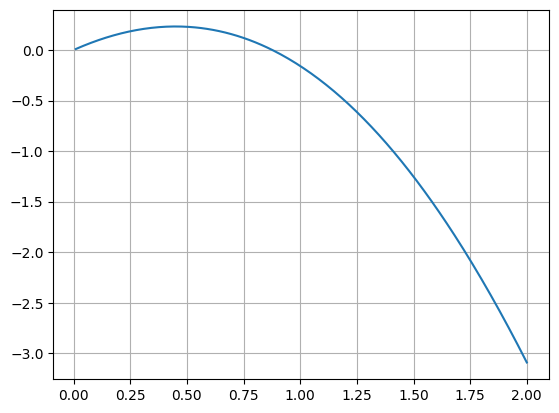

In [23]:
plot_function()

In [25]:
def bisection_method(xl, xu, tol=5, max_iter=50):
    ea = 100
    cold = xl
    if f(xl)*f(xu) > 0:
        print("Bisection method fails. Choose different interval")
        return None
    for i in range(max_iter):
        c = (xl + xu)/2
        ea = (abs(c - cold)/c)*100
        if ea < 5:
            return (xl + xu)/2
        if f(c) == 0:
            return c
        if f(xl)*f(c) < 0:
            xu = c
        else:
            xl = c
    return (xl + xu)/2 



In [26]:
bisection_method(.01, 2)

0.8767262153950626